Capstone

Create dummy columns for the tags column. Perform exploratory data analysis on talks by tag, year, etc

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re

from sklearn.preprocessing import MultiLabelBinarizer

In [186]:
# Load transcripts file 

with open('../data/transcripts_clean.pickle', 'rb') as f:
    transcripts = pickle.load(f)

transcripts.head(3)

,title,speaker,url,month,year,tags,views,transcript,run_time
0,Community-powered solutions to the climate crisis,Rahwa Ghirmatzion and Zelalem Adefris,/talks/rahwa_ghirmatzion_and_zelalem_adefris_c...,Feb,2021,"[climate change, Countdown, activism, communit...",472619,Don Home. It's where we celebrate our triumph...,4:32
1,A simple 2-step plan for saving more money,Wendy De La Rosa,/talks/wendy_de_la_rosa_a_simple_2_step_plan_f...,Feb,2021,"[goal-setting, finance, self, money]",0,Everyone's heard of the tired old adage of pay...,2:41
2,"What causes dandruff, and how do you get rid o...",Thomas L. Dawson,/talks/thomas_l_dawson_what_causes_dandruff_an...,Feb,2021,"[TED-Ed, education, human body, animation, sci...",0,"Here in this abundant forest, Malassezia is eq...",4:51


In [187]:
transcripts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4281 entries, 0 to 4383
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       4281 non-null   object
 1   speaker     4281 non-null   object
 2   url         4281 non-null   object
 3   month       4281 non-null   object
 4   year        4281 non-null   int64 
 5   tags        4281 non-null   object
 6   views       4281 non-null   int32 
 7   transcript  4281 non-null   object
 8   run_time    4281 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 317.7+ KB


Compare number of TED talks grouped by year.

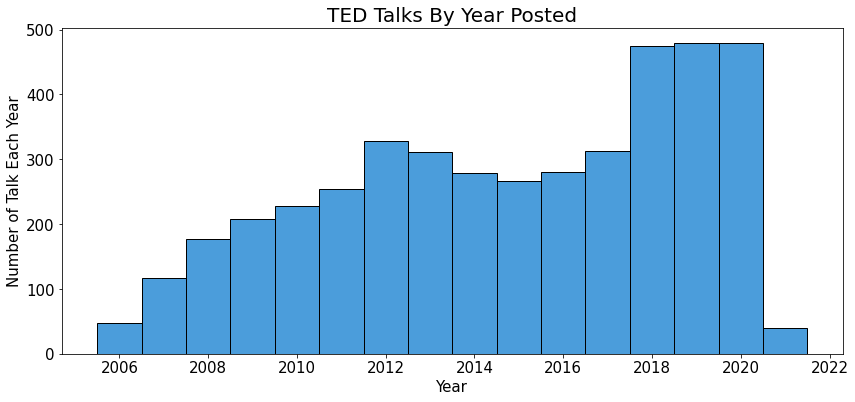

In [188]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.histplot(x='year', data=transcripts, ax=ax, discrete=True, color='#0f7ccf')

#ax.set_xticklabels(labels=top_20_tags.index, rotation=30)

ax.set_title("TED Talks By Year Posted",fontsize=20)
ax.set_xlabel("Year",fontsize=15)
ax.set_ylabel("Number of Talk Each Year",fontsize=15)
ax.tick_params(labelsize=15)

Calculate character count

In [189]:
transcripts['char_count'] = [len(script) for script in transcripts['transcript']]
transcripts.head()

,title,speaker,url,month,year,tags,views,transcript,run_time,char_count
0,Community-powered solutions to the climate crisis,Rahwa Ghirmatzion and Zelalem Adefris,/talks/rahwa_ghirmatzion_and_zelalem_adefris_c...,Feb,2021,"[climate change, Countdown, activism, communit...",472619,Don Home. It's where we celebrate our triumph...,4:32,3909
1,A simple 2-step plan for saving more money,Wendy De La Rosa,/talks/wendy_de_la_rosa_a_simple_2_step_plan_f...,Feb,2021,"[goal-setting, finance, self, money]",0,Everyone's heard of the tired old adage of pay...,2:41,2713
2,"What causes dandruff, and how do you get rid o...",Thomas L. Dawson,/talks/thomas_l_dawson_what_causes_dandruff_an...,Feb,2021,"[TED-Ed, education, human body, animation, sci...",0,"Here in this abundant forest, Malassezia is eq...",4:51,3938
3,The artist who won a Nobel Prize... in medicine,Melanie E. Peffer,/talks/melanie_e_peffer_the_artist_who_won_a_n...,Feb,2021,"[animation, education, TED-Ed, history, scienc...",92822,"In the late 1860s, scientists believed they we...",4:49,4145
4,A concrete idea to reduce carbon emissions,Karen Scrivener,/talks/karen_scrivener_a_concrete_idea_to_redu...,Feb,2021,"[Countdown, materials, climate change, innovat...",605375,Concrete is the second most used substance on ...,4:26,3390


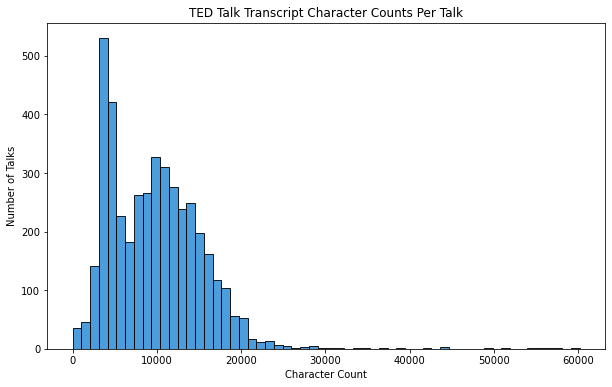

In [190]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

plt.xlabel('Character Count')
plt.ylabel('Number of Talks')
plt.title("TED Talk Transcript Character Counts Per Talk")
ax = sns.histplot(x='char_count', data=transcripts, ax=ax, color="#0f7ccf")

In [191]:
transcripts['char_count'].describe()

count     4281.000000
mean      9748.959589
std       5610.370243
min          1.000000
25%       4829.000000
50%       9447.000000
75%      13286.000000
max      60215.000000
Name: char_count, dtype: float64

The average number of characters in a TED talk is 9748, ranging from 1 up to 60,215.

---
Create dummy columns so we can count for some analysis on which tags are most popular, etc.

In [192]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(transcripts['tags'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [193]:
print (f'There are {len(mlb.classes_)} unique tags (categories) associated with the TED talks. ')

There are 459 unique tags (categories) associated with the TED talks. 


A sampling of the talk tags look like this:

In [194]:
list(mlb.classes_)[0:10]

['3D printing',
 'AI',
 'AIDS',
 'Africa',
 "Alzheimer's",
 'Antarctica',
 'Anthropocene',
 'Asia',
 'Audacious Project',
 'Autism spectrum disorder']

In [195]:
tags_df = pd.DataFrame(mlb.fit_transform(transcripts['tags']), columns=mlb.classes_)
tags_df.head()

,3D printing,AI,AIDS,Africa,Alzheimer's,Antarctica,Anthropocene,Asia,Audacious Project,Autism spectrum disorder,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
tags_counts = pd.DataFrame(tags_df.sum(axis=0), columns=['count'])
tags_counts.head()

,count
3D printing,12
AI,82
AIDS,16
Africa,166
Alzheimer's,10


In [197]:
tags_counts.sort_values(by='count', ascending=False, inplace=True)
top_10_tags = tags_counts.head(10)
top_10_tags

,count
science,1045
technology,1001
culture,700
TED-Ed,687
animation,616
TEDx,613
global issues,579
society,572
social change,554
education,532


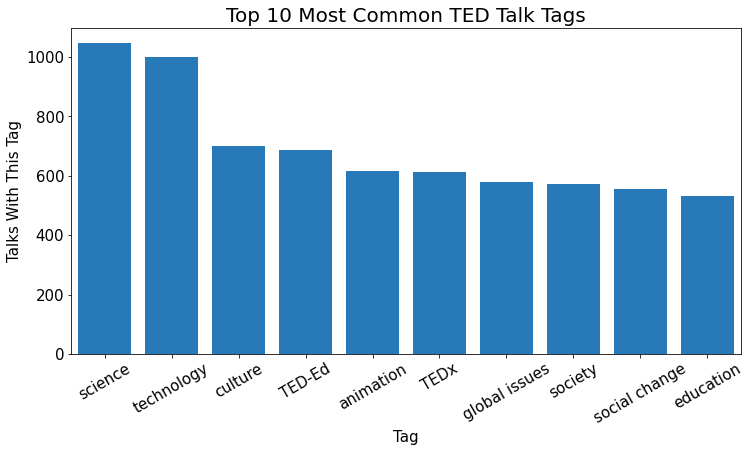

In [224]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=top_10_tags.index, y = 'count' , data=top_10_tags, ax=ax, color='#0f7ccf')

ax.set_xticklabels(labels=top_10_tags.index, rotation=30)

ax.set_title("Top 10 Most Common TED Talk Tags",fontsize=20)
ax.set_xlabel("Tag",fontsize=15)
ax.set_ylabel("Talks With This Tag",fontsize=15)
ax.tick_params(labelsize=15)

---
Sort talks by the most viewed. Then extract the tags for the most popular 20 talks.

In [199]:
top_20_views = transcripts.sort_values(by='views', ascending=False)[0:21]
top_20_views.reset_index(inplace=True, drop=True)
top_20_views.head()

,title,speaker,url,month,year,tags,views,transcript,run_time,char_count
0,Do schools kill creativity?,Sir Ken Robinson,/talks/sir_ken_robinson_do_schools_kill_creati...,Jun,2006,"[children, creativity, culture, dance, educati...",69550156,Good morning. How are you? Good. It's been gr...,19:24,17079
1,This is what happens when you reply to spam email,James Veitch,/talks/james_veitch_this_is_what_happens_when_...,Jan,2016,"[comedy, curiosity, communication, humor, tech...",63609417,"A few years ago, I got one of those spam email...",9:48,6436
2,Your body language may shape who you are,Amy Cuddy,/talks/amy_cuddy_your_body_language_may_shape_...,Oct,2012,"[body language, brain, business, psychology, s...",60343159,So I want to start by offering you a free no-t...,21:02,19900
3,How great leaders inspire action,Simon Sinek,/talks/simon_sinek_how_great_leaders_inspire_a...,May,2010,"[TEDx, business, entrepreneur, leadership, suc...",53557956,How do you explain when things don't go as we ...,18:04,16667
4,The power of vulnerability,Brené Brown,/talks/brene_brown_the_power_of_vulnerability/...,Dec,2010,"[TEDx, communication, culture, depression, fea...",51984142,"So, I'll start with a couple years ago, an ev...",20:19,16584


Repeat process from above to find the most common tags in the most viewed talks.

In [200]:
mlb_top_20 = MultiLabelBinarizer()
mlb_top_20.fit_transform(top_20_views['tags'])

print (f'There are {len(mlb_top_20.classes_)} unique tags (categories) associated with the top 20 most viewed TED talks. ')

There are 81 unique tags (categories) associated with the top 20 most viewed TED talks. 


In [201]:
# Concat the dummies so we can later find talks with each tag
top_20_tag_dummies_df = pd.DataFrame(mlb_top_20.fit_transform(top_20_views['tags']), columns=mlb_top_20.classes_)
top_20_tag_df = pd.concat([top_20_views, top_20_tag_dummies_df] , axis=1)
top_20_tag_df.head(3)

,title,speaker,url,month,year,tags,views,transcript,run_time,char_count,...,storytelling,success,teaching,technology,time,visualizations,war,work,work-life balance,writing
0,Do schools kill creativity?,Sir Ken Robinson,/talks/sir_ken_robinson_do_schools_kill_creati...,Jun,2006,"[children, creativity, culture, dance, educati...",69550156,Good morning. How are you? Good. It's been gr...,19:24,17079,...,0,0,1,0,0,0,0,0,0,0
1,This is what happens when you reply to spam email,James Veitch,/talks/james_veitch_this_is_what_happens_when_...,Jan,2016,"[comedy, curiosity, communication, humor, tech...",63609417,"A few years ago, I got one of those spam email...",9:48,6436,...,0,0,0,1,0,0,0,0,0,0
2,Your body language may shape who you are,Amy Cuddy,/talks/amy_cuddy_your_body_language_may_shape_...,Oct,2012,"[body language, brain, business, psychology, s...",60343159,So I want to start by offering you a free no-t...,21:02,19900,...,0,1,0,0,0,0,0,0,0,0


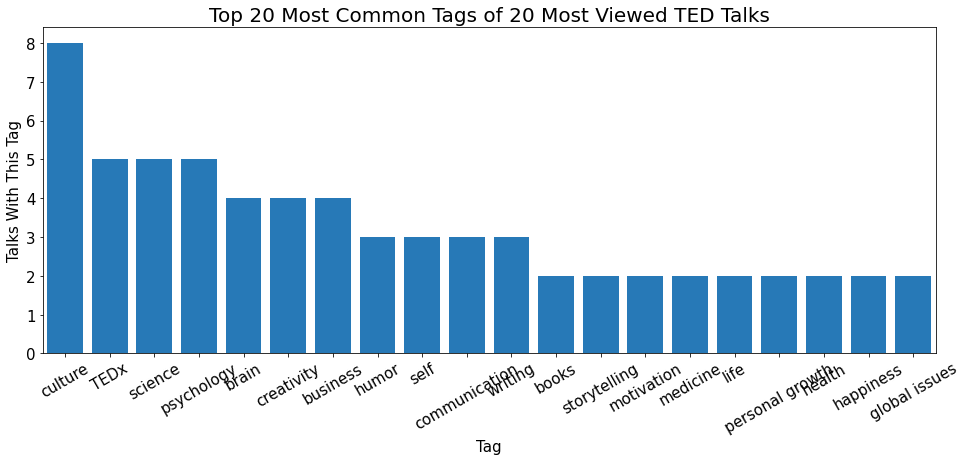

In [219]:
tags_most_viewed_counts = pd.DataFrame(top_20_tag_dummies_df.sum(axis=0), columns=['count'])

tags_most_viewed_counts.sort_values(by='count', ascending=False, inplace=True)
top_20_most_viewed_tags = tags_most_viewed_counts.head(20)

fig, ax = plt.subplots(figsize=(16,6))

ax = sns.barplot(x=top_20_most_viewed_tags.index, y = 'count' , data=top_20_most_viewed_tags, ax=ax, color='#0f7ccf')

ax.set_xticklabels(labels=top_20_most_viewed_tags.index, rotation=30)

ax.set_title("Top 20 Most Common Tags of 20 Most Viewed TED Talks",fontsize=20)
ax.set_xlabel("Tag",fontsize=15)
ax.set_ylabel("Talks With This Tag",fontsize=15)
ax.tick_params(labelsize=15)

In [204]:
print (f'The most viewed TED talk has been viewed {top_20_views["views"].max():,}')
print (f'The 20th most viewed TED talk has been viewed {top_20_views["views"].min():,}')

The most viewed TED talk has been viewed 69,550,156
The 20th most viewed TED talk has been viewed 25,775,062


#### Create list of top 6 tags to use to build 6 separate corpura.

Use six tags, since there was a four-way tie for 3rd most common tags (after dropping TEDx). Brain, psychology, creativity and business all had two talks each.

Exclude the tag TEDx, which indentifies if it was a [TEDx event](https://www.ted.com/about/programs-initiatives/tedx-program). TEDx events are independently organized at a local, grassroots level. 

Quote from the TED web site:

> TEDx events include live speakers and recorded TED Talks, and are organized independently under a free license granted by TED. These events are not controlled by TED, but event organizers agree to abide by our format, and are offered guidelines for curation, speaker coaching, event organizing and more.

In [205]:
list_of_top_6_tags = list(top_20_most_viewed_tags[0:7].index)
list_of_top_6_tags.remove('TEDx')

# Add our own custom tag to export all of the top 20 talks.
list_of_top_6_tags.append('all')
list_of_top_6_tags

['culture', 'science', 'psychology', 'brain', 'creativity', 'business', 'all']

In [206]:
top_20_views.columns

Index(['title', 'speaker', 'url', 'month', 'year', 'tags', 'views',
       'transcript', 'run_time', 'char_count'],
      dtype='object')

Create a function that will take a tag, and create a corpus of all TED talk transcripts for that tag. Later I will train models, one for each of the most popular tags.

In [207]:
def export_corpus (tag, lower_case=False):
    
    #export all talks in the top 20
    if tag == 'all':
        this_corpus = ' '.join(top_20_tag_df['transcript'].values)
    else:
        this_corpus = ' '.join(top_20_tag_df[top_20_tag_df[tag] == 1]['transcript'].values)
    
    if lower_case:
        this_corpus = this_corpus.lower
        output_file_name = f'../data/{tag}_lower_case.txt'
    else:
        output_file_name = f'../data/{tag}_sentence_case.txt'
    
    corpus_file = open(output_file_name, 'w', encoding='utf-8')
    corpus_file.write(this_corpus)
    corpus_file.close()
    

#### Export corpora to text files

In [208]:
for tag in list_of_top_6_tags:
    export_corpus (tag)

In [209]:
top_20_views

,title,speaker,url,month,year,tags,views,transcript,run_time,char_count
0,Do schools kill creativity?,Sir Ken Robinson,/talks/sir_ken_robinson_do_schools_kill_creati...,Jun,2006,"[children, creativity, culture, dance, educati...",69550156,Good morning. How are you? Good. It's been gr...,19:24,17079
1,This is what happens when you reply to spam email,James Veitch,/talks/james_veitch_this_is_what_happens_when_...,Jan,2016,"[comedy, curiosity, communication, humor, tech...",63609417,"A few years ago, I got one of those spam email...",9:48,6436
2,Your body language may shape who you are,Amy Cuddy,/talks/amy_cuddy_your_body_language_may_shape_...,Oct,2012,"[body language, brain, business, psychology, s...",60343159,So I want to start by offering you a free no-t...,21:02,19900
3,How great leaders inspire action,Simon Sinek,/talks/simon_sinek_how_great_leaders_inspire_a...,May,2010,"[TEDx, business, entrepreneur, leadership, suc...",53557956,How do you explain when things don't go as we ...,18:04,16667
4,The power of vulnerability,Brené Brown,/talks/brene_brown_the_power_of_vulnerability/...,Dec,2010,"[TEDx, communication, culture, depression, fea...",51984142,"So, I'll start with a couple years ago, an ev...",20:19,16584
5,Inside the mind of a master procrastinator,Tim Urban,/talks/tim_urban_inside_the_mind_of_a_master_p...,Mar,2016,"[brain, comedy, decision-making, entertainment...",47503316,"So in college, I was a government major, which...",14:03,12333
6,The next outbreak? We're not ready,Bill Gates,/talks/bill_gates_the_next_outbreak_we_re_not_...,Apr,2015,"[disaster relief, disease, ebola, global issue...",39876722,"When I was a kid, the disaster we worried abou...",8:32,6638
7,My philosophy for a happy life,Sam Berns,/talks/sam_berns_my_philosophy_for_a_happy_lif...,Mar,2018,"[life, happiness, personal growth, self, motiv...",39468720,"Hello everyone. I'm Sam, and I just turned 17....",12:45,8783
8,What makes a good life? Lessons from the longe...,Robert Waldinger,/talks/robert_waldinger_what_makes_a_good_life...,Dec,2015,"[TEDx, aging, data, health, humanity, life, ha...",36957121,What keeps us healthy and happy as we go throu...,12:46,9593
9,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,/talks/cameron_russell_looks_aren_t_everything...,Jan,2013,"[TEDx, beauty, culture, fashion, photography]",36851641,"Hi. My name is Cameron Russell, and for the la...",9:37,8818


Write the full corpus of all talks to file. First export with `Sentence Case`.

In [210]:
all_transcripts = ' '.join(transcripts['transcript'])

corpus_file = open(r'../data/all_transcripts_sentence_case.txt', 'w', encoding='utf-8')
corpus_file.write(all_transcripts)
corpus_file.close()

Next write the full corpus of all talks to file after converting to `lower case`

In [211]:
all_transcripts = all_transcripts.lower()

In [212]:
corpus_file = open(r'../data/all_transcripts_lowercase.txt', 'w', encoding='utf-8')
corpus_file.write(all_transcripts)
corpus_file.close()

Inspect how TED talks by how many words they contain

In [213]:
words = set(all_transcripts.split(' '))
len(words)

173955

In [214]:
transcripts['word_count'] = [len (talk_text.split(' ') ) for talk_text in transcripts['transcript']]


In [215]:
transcripts.sort_values(by='word_count', ascending=False)[0:10]

,title,speaker,url,month,year,tags,views,transcript,run_time,char_count,word_count
383,The quest for the coronavirus vaccine,Seth Berkley,/talks/seth_berkley_the_quest_for_the_coronavi...,Mar,2020,"[Vaccines, disease, public health, medicine, c...",595323,"Whitney Pennington Hello everyone, and welcom...",2m,60215,11120
376,It's OK to feel overwhelmed. Here's what to do...,Elizabeth Gilbert,/talks/elizabeth_gilbert_it_s_ok_to_feel_overw...,Apr,2020,"[compassion, emotions, life, philosophy, coron...",2581439,"Chris Well, hello, Helen. Very nice to see yo...",2m,57316,10788
1020,Sir Ken Robinson (still) wants an education re...,The TED Interview,/talks/the_ted_interview_sir_ken_robinson_stil...,Dec,2018,"[creativity, teaching, education]",114916,Welcome to the TED Interview. I'm Chris Ander...,55:53,55661,10199
302,The path to ending systemic racism in the US,"Dr. Phillip Atiba Goff, Rashad Robinson, Dr. B...",/talks/dr_phillip_atiba_goff_rashad_robinson_d...,Jun,2020,"[race, social change, justice system, inequali...",2238034,"Chris Hello, TED community, welcome back for ...",6m,56128,10163
385,What the world can learn from China's response...,Gary Liu,/talks/gary_liu_what_the_world_can_learn_from_...,Mar,2020,"[TED Connects, virus, coronavirus, china, Asia...",2328961,Chris Welcome to TED Connects. This is a new ...,58:23,56713,10075
535,How we can turn the tide on climate,Christiana Figueres and Chris Anderson,/talks/christiana_figueres_and_chris_anderson_...,Dec,2019,"[climate change, environment, activism, sustai...",2131191,[Citizens of the world] [We face a global cris...,5m,54797,9829
1784,Nationalism vs. globalism: the new political d...,Yuval Noah Harari,/talks/yuval_noah_harari_nationalism_vs_global...,Feb,2017,"[big problems, climate change, collaboration, ...",3251368,Chris Hello. Welcome to this TED Dialogues. I...,0m,50875,9182
372,An ethical plan for ending the pandemic and re...,Danielle Allen,/talks/danielle_allen_an_ethical_plan_for_endi...,Apr,2020,"[coronavirus, pandemic, virus, software, TED C...",2024426,"Corey Hi, Chris, how are you? Chris I'm very...",50:07,49129,8924
1744,Political common ground in a polarized United ...,"Gretchen Carlson, David Brooks",/talks/gretchen_carlson_david_brooks_political...,Apr,2017,"[collaboration, communication, democracy, gove...",1068969,Chris Welcome to this next edition of TED Dia...,47:33,43823,8001
367,What coronavirus means for the global economy,Ray Dalio,/talks/ray_dalio_what_coronavirus_means_for_th...,Apr,2020,"[coronavirus, finance, global issues, economic...",2299171,Corey Are you there? Ray Hi. Thank you so m...,52:40,42346,7806


I realized at the end of my project there were a handful of TED talks that were just videos, and did have any transcripts longer than 100 character. An example is a TED talk which solely contains a demonstration of dancing robots.  

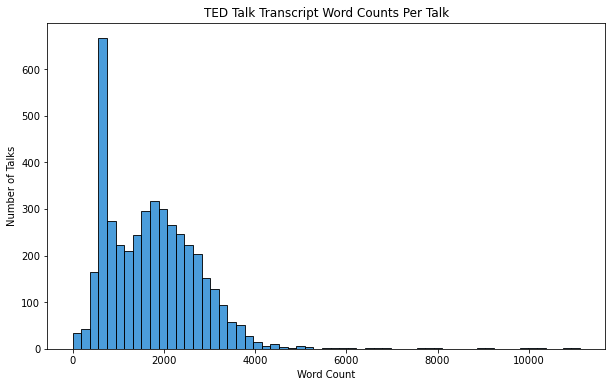

In [216]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

plt.xlabel('Word Count')
plt.ylabel('Number of Talks')
plt.title("TED Talk Transcript Word Counts Per Talk")
ax = sns.histplot(x='word_count', data=transcripts, ax=ax, color="#0f7ccf")

In [217]:
print (f'The total number of words combined in all transcripts is: {transcripts["word_count"].sum():,}')

The total number of words combined in all transcripts is: 7,531,177


In [218]:
print (f'The total number of characters combined in all transcripts is: {transcripts["char_count"].sum():,}')

The total number of characters combined in all transcripts is: 41,735,296
